## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
import pandas as pd
import numpy as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [4]:
#loading file
file_name = "/home/matteo/Scrivania/LaboratoryOfComputationalPhysics_Y4/data/data_000637.txt"
entries = 50000 #smaller than 1'310'720 and bigger than 10'000
data = pd.read_csv(file_name)

#redefined lower case dataframe and 50k entries
df = pd.DataFrame(
    { 'head'        : data["HEAD"],
      'FPGA'        : data["FPGA"],
      'tdc_channel' : data["TDC_CHANNEL"],
      'orbit_cnt'   : data["ORBIT_CNT"],
      'bx_counter'  : data["BX_COUNTER"],
      'tdc_meas'    : data["TDC_MEAS"],
    }
    )
df.head(entries//2)

,head,FPGA,tdc_channel,orbit_cnt,bx_counter,tdc_meas
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
24995,1,0,72,3869200416,1932,14
24996,1,0,54,3869200416,1932,28
24997,1,1,64,3869200416,2018,20
24998,1,1,6,3869200416,2098,4


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
#number of bx in a orbit (value of x)
max_bx = df['bx_counter'].max()
min_bx = df['bx_counter'].min() #unuseful, equal to zero!
x = (max_bx - min_bx) + 1
print('x =', x)

x = 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
#how much time the data taking lasted
t1 = (df.loc[entries-1,'orbit_cnt'] - df.loc[0,'orbit_cnt']) * x * 25
t2 = (df.loc[entries-1,'bx_counter'] - df.loc[0,'bx_counter']) * 25
t3 = (df.loc[entries-1,'tdc_meas'] - df.loc[0,'tdc_meas']) * 25/30
time = t1 + t2 + t3

print('data taking lasted', time*1e-9, "s")

data taking lasted 0.04425308333333334 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
#new column with abs value of time (in ns)
df['time'] = df['orbit_cnt'] * x * 25 + df['bx_counter'] * 25 + df['tdc_meas'] * 25/30
df

,head,FPGA,tdc_channel,orbit_cnt,bx_counter,tdc_meas,time
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [5]:
#replace head values setting randomly to 0 or 1
df['head'] = np.random.randint(2, size=len(df))
df

,head,FPGA,tdc_channel,orbit_cnt,bx_counter,tdc_meas
0,0,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,0,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14
1310716,0,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [6]:
#new dataframe selecting only head=1 rows
df1 = df[df['head'] == 1]
df1

,head,FPGA,tdc_channel,orbit_cnt,bx_counter,tdc_meas
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
4,1,0,64,3869200167,2760,25
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7
...,...,...,...,...,...,...
1310709,1,1,38,3869211171,417,8
1310713,1,0,64,3869211171,758,18
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

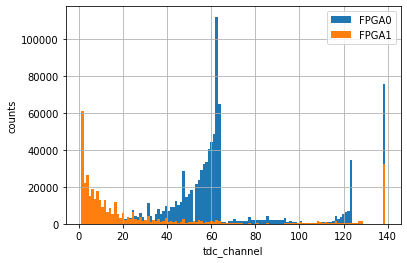

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the number of counts per TDC channel (occupancy plot) for each of the two FPGA
fpga0 = df[df['FPGA'] == 0]
fpga1 = df[df['FPGA'] == 1]
plt.hist(fpga0["tdc_channel"], bins=120, label="FPGA0")
plt.hist(fpga1["tdc_channel"], bins=120, label="FPGA1")
plt.xlabel('tdc_channel')
plt.ylabel('counts')
plt.legend()
plt.grid()
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [11]:
#finding noisy channels (top 3 TDC channels with most counts)
gby = df.groupby('tdc_channel').sum()
ord = gby.sort_values(by="orbit_cnt", ascending=False)
print("top 3 TDC channels are:")
ord.head(3)

top 3 TDC channels are:


,head,FPGA,orbit_cnt,bx_counter,tdc_meas
tdc_channel,,,,,
139,54332,32442,418102549486957,192477704,0
64,32999,1439,255444994368975,117767051,962195
63,32100,918,250113227630194,115482430,938192


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [13]:
#number of unique orbits
uniorb = np.unique(df["orbit_cnt"])
print("number of unique orbits:", len(uniorb))

#number of unique orbits with at least one measurement from tdc_ channel 139
orb139 = df[df['tdc_channel'] == 139]
uniorb139 = np.unique(orb139["orbit_cnt"])
print("number of unique orbits from tdc_ channel 139:", len(uniorb139))

number of unique orbits: 11001
number of unique orbits from tdc_ channel 139: 10976
